<a href="https://colab.research.google.com/github/MarianaObandoGutierrez/ProgramacionAplicada2024_HB/blob/main/Video_pot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad potenciometro

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Primero, adjuntamos el codigo implementado en la rapsberry

           import network
           import urequests
           from time import sleep
           from machine import ADC

           # Network Initialization
           ssid = "MARIANAA24"
           password = "3143347415"

           def ConnectWiFi():
               wlan = network.WLAN(network.STA_IF)
               wlan.active(True)
               wlan.connect(ssid, password)
               while not wlan.isconnected():
                   print('Waiting for connection...')
                   sleep(1)
               ip = wlan.ifconfig()[0]
               print(f'Connected on {ip}')
               return ip

           # Connect to Network
           ip = ConnectWiFi()

           # Main code

           # Configura el pin del potenciómetro
           pot_pin = ADC(28)  # Asegúrate de usar el pin adecuado para tu dispositivo

           # Configura las credenciales de ThingSpeak
           write_key = '4DYPJMLE92W0F42C'
           thingspeak_url = 'https://api.thingspeak.com/update'

           def read_pot_value():
               # Lee el valor del potenciómetro (0-65535)
               pot_value = pot_pin.read_u16()
               # Convierte el valor leído a un rango de 0-100
               return int(pot_value * 100 / 65535)

           def send_to_thingspeak(values):
               # Prepara los campos para ThingSpeak
               fields = '&'.join([f'field{i+1}={values[i]}' for i in range(len(values))])
               url = f'{thingspeak_url}?api_key={write_key}&{fields}'
               response = urequests.get(url)
               print('Response:', response.text)
               response.close()

           # Acumula los valores
           values = []

           while True:
               pot_value = read_pot_value()
               print('Potentiometer Value:', pot_value)
               values.append(pot_value)

               # Envía los datos a ThingSpeak cada 3 segundos
               if len(values) == 8:  # Envía en lotes de 8 valores (puede ser cualquier número <= 8)
                   send_to_thingspeak(values)
                   values = []  # Reinicia la lista de valores

               sleep(3)  # Lee y acumula datos cada 3 segundos

Datos recibios en Thonny

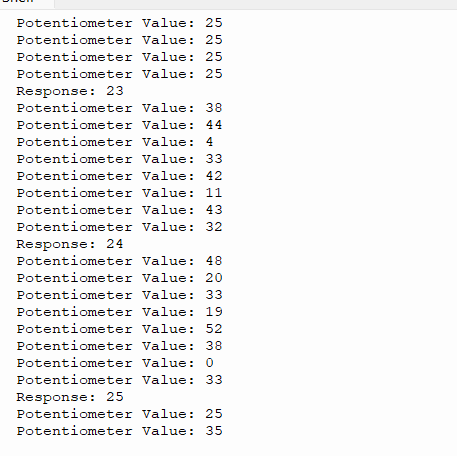

In [2]:
from IPython.display import Image
Image("/content/drive/MyDrive/pot.png")

Datos recibidos en el canal de Thingspeak


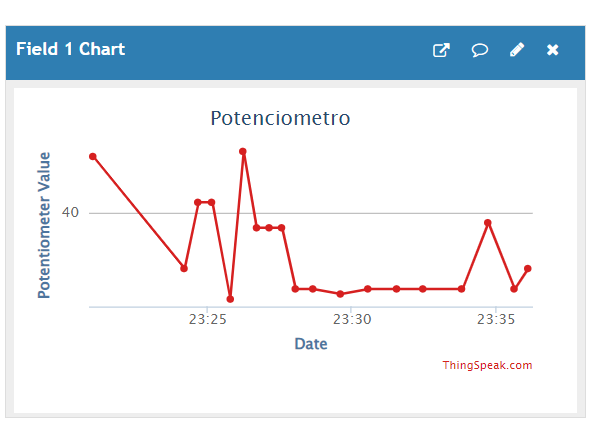

In [3]:
from IPython.display import Image
Image("/content/drive/MyDrive/pot2.png")

In [4]:
from IPython.display import Video, display

# Ruta al archivo de video en Google Drive
video_path = '/content/drive/MyDrive/potenciometro.mp4'

# Reproducir el video
display(Video(video_path, embed=True))